# Lab 3 Evaluation

Names, Surnames, and Group : (to complete by 2 students)

4 IR SI - Groupe A2
- Firmin Rousseau
- Anya Meetoo

In the following, we consider the  (binarized) Compas dataset that we studied in the Lab

In [45]:
import csv 
import numpy as np

def load_from_csv(fname) :
    features = []
    prediction_name = ""

    with open(fname, "r") as f:
        features = f.readline().strip().split(",")
        prediction_name = features[-1]
        features = features[0:-1]

    data = np.genfromtxt(fname, dtype=np.uint8, skip_header=1, delimiter=",")

    X = data[:, 0:-1]
    y = data[:, -1]

    return X, y, features, prediction_name

Q1: A decision tree configuration is a set of parameters that one can use to build decision trees. Propose 6 configurations that are likely to provide different topologies and caracteristics

In [46]:
from sklearn.model_selection import ParameterGrid
from sklearn import tree

# parameters configuration

# 54 configurations
# parameters = {
#     'splitter': ['best'],
#     'max_depth': [1,2,3,5,7,9,11,13,15],
#     'min_samples_leaf': [1,2,3,4,5,6]
# }
# grid = ParameterGrid(parameters)


# 6 configurations
grid = [
    {'splitter': 'best', 'max_depth': 2,  'min_samples_leaf': 1},
    {'splitter': 'best', 'max_depth': 3,  'min_samples_leaf': 2},
    {'splitter': 'best', 'max_depth': 5,  'min_samples_leaf': 3},
    {'splitter': 'best', 'max_depth': 7,  'min_samples_leaf': 4},
    {'splitter': 'best', 'max_depth': 9,  'min_samples_leaf': 5},
    {'splitter': 'best', 'max_depth': 11, 'min_samples_leaf': 6}
]


trees=[]
for params in grid:
    tree1 = tree.DecisionTreeClassifier(**params)
    trees.append(tree1)    

print(f"number of configurations : {len(trees)}")

number of configurations : 6


Q2: Train a decision tree for each of the previous configurations on the full dataset

In [47]:
train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")

fit_trees=[]
for tr in trees:
    fit_trees.append(tr.fit(train_examples, train_labels)) # train each tree

In [48]:
# Another method is using GridSearchCV

from sklearn.model_selection import GridSearchCV

# 54 configurations
parameters = {
     'splitter': ['best'],
     'max_depth': [1,2,3,5,7,9,11,13,15],
     'min_samples_leaf': [1,2,3,4,5,6]
}

grid_cv=GridSearchCV(estimator=tree.DecisionTreeClassifier(), param_grid=parameters, cv=5)

grid_cv = grid_cv.fit(train_examples,train_labels)

clf=grid_cv.best_estimator_
a=grid_cv.best_params_

sc=clf.score(train_examples,train_labels)

print(f"score = {sc*100} %")

score = 68.63265693153802 %


Q3: Propose an evaluation in terms of training and testing accuracies using $5$-cross validation on two decision trees that have different topologies

In [49]:
# cross-evaluation function
from sklearn.model_selection import cross_val_score

# Parameters 
param1 = {'max_depth': 3, 'min_samples_leaf': 1, 'splitter': 'best'}
param2 = {'max_depth': 15, 'min_samples_leaf': 5, 'splitter': 'best'}

# Create two decision trees
tree1 = tree.DecisionTreeClassifier(**param1)
tree2 = tree.DecisionTreeClassifier(**param2)

# Evaluate with 5-fold cross-validation
scores1 = cross_val_score(tree1, train_examples, train_labels, cv=5)
scores2 = cross_val_score(tree2, train_examples, train_labels, cv=5)

# Training 
tree1.fit(train_examples, train_labels)
tree2.fit(train_examples, train_labels)

train_score1 = tree1.score(train_examples, train_labels)
train_score2 = tree2.score(train_examples, train_labels)

# Print results
print("Tree 1:")
print(f"Config: {param1}")
print(f"Training Accuracy: {train_score1*100} %")
print(f"Testing Accuracy (5-fold CV): {scores1.mean()*100} %")

print("\nTree 2 :")
print(f"Config: {param2}")
print(f"Training Accuracy: {train_score2*100} %")
print(f"Testing Accuracy (5-fold CV): {scores2.mean()*100} %")

Tree 1:
Config: {'max_depth': 3, 'min_samples_leaf': 1, 'splitter': 'best'}
Training Accuracy: 64.08116821543713 %
Testing Accuracy (5-fold CV): 63.73997499932552 %

Tree 2 :
Config: {'max_depth': 15, 'min_samples_leaf': 5, 'splitter': 'best'}
Training Accuracy: 68.91712497629433 %
Testing Accuracy (5-fold CV): 65.67405595474698 %


Q4: Propose an experimental study that shows the transition phase from underfitting to overfitting 

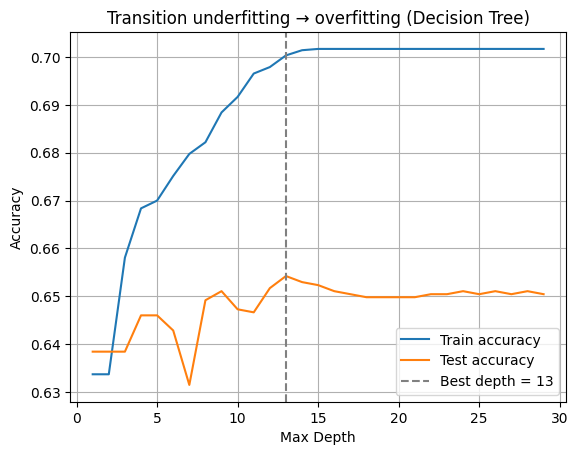

In [50]:
from sklearn.model_selection import ParameterGrid
from sklearn import tree

from sklearn.model_selection import train_test_split

train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")
X_train, X_test, y_train, y_test = train_test_split(train_examples, train_labels, test_size=0.3, random_state=42)

parameters = {
    'max_depth': [i for i in range(1,30)]
}
grid = ParameterGrid(parameters)
trees=[]
train_scores = []
test_scores = []
depths = []

for params in grid:
    clf = tree.DecisionTreeClassifier(**params)
    clf.fit(X_train, y_train)

    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)
    depths.append(params['max_depth'])

best_depth = depths[test_scores.index(max(test_scores))]

# PLOTTING 
import matplotlib.pyplot as plt

plt.plot(depths, train_scores, label='Train accuracy')
plt.plot(depths, test_scores, label='Test accuracy')
plt.axvline(best_depth, linestyle='--', color='gray', label=f'Best depth = {best_depth}')

plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Transition underfitting → overfitting (Decision Tree)')
plt.legend()
plt.grid()
plt.show()



- The graph shows the evolutions of training and testing accuracy of a decision tree as we increase its depth from 1 to 29.
- When both training and testing accuracies are low (before depth = 13), this indicates underfitting.
- At depth 13, this point is called the optimal generalisation as it shows the best depth which is neither underfitting or overfitting.
- After depth 13, the training accuracy approaches 71% but testing is way less, showing signs of overfitting.

Q5: Construct the confusion matrix on a particular good configuration (after explaining your choice)

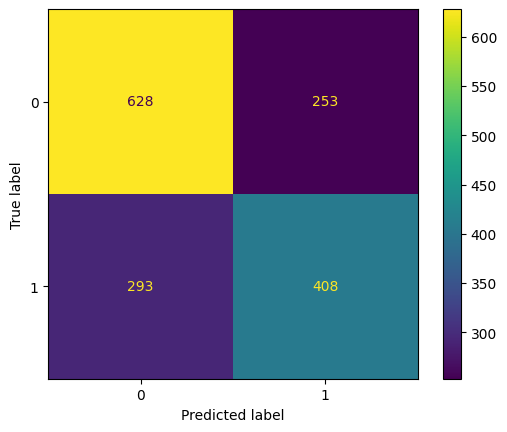

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X, Y, features, prediction = load_from_csv("./compass.csv")
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Train with best depth (good configuration explained in Q4)
clf = DecisionTreeClassifier(max_depth=13)
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0", "1"])
disp.plot()


Q6: Provide an evaluation of the fairness of the model based on the False Positive Rate

In [ ]:
import csv
import numpy as np


# comparing Y_test and Y_pred => rate false_postive
def false_positive_rate(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    true_neg, false_pos, false_neg, true_pos = cm.ravel()
    
    # false positive rate = all_false_positive / sum(all_false_positive + all_true_negative)
    return false_pos / (false_pos + true_neg) 

X, Y, features, prediction = load_from_csv("./compass.csv")

# choose first column (feature) : race_African-American to be fair 
# this will be used to do the evaluation of False Postive Rate 
race_column = X[:, 0]

X_train, X_test, Y_train, Y_test, race_train, race_test = train_test_split(X, Y, race_column, test_size=0.3, random_state=42)

# Train decision tree
clf = DecisionTreeClassifier(max_depth=13)
clf.fit(X_train, Y_train)

# Predictions
Y_pred = clf.predict(X_test)

# split race test into class 0 and class 1 (negative, positive)
class0 = []
class1 = []

for index in range(len(race_test)) :
    if race_test[index] == 0 : class0.append(index)
    elif race_test[index] == 1 : class1.append(index)

# false positive rate for both classes
rate_false_posive_0 = false_positive_rate(Y_test[class0], Y_pred[class0])
rate_false_posive_1 = false_positive_rate(Y_test[class1], Y_pred[class1])

print(f"False Positive Rate for Group 0: {rate_false_posive_0:}")
print(f"False Positive Rate for Group 1: {rate_false_posive_1:}")

False Positive Rate for Group 0: 0.1715686274509804
False Positive Rate for Group 1: 0.386892177589852
